In [1]:
import numpy as np 
import pandas as pd 
import os

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv(r"C:\Users\siva M\Downloads\collegePlace (1).csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
df.shape

(2966, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

C:\Users\siva M\AppData\Local\Temp\ipykernel_8984\3684095087.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


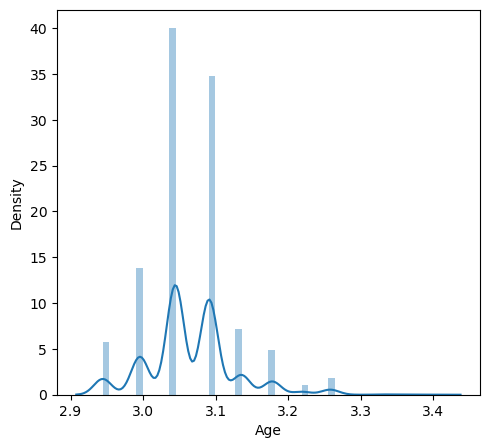

In [8]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    
transformationplot(np.log(df['Age'])) 

In [9]:
df = df.replace(['Male'],[0])
df = df.replace(['Female'],[1])

df = df.replace(['Computer Science', 'Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

In [10]:
df = df.drop(['Hostel'], axis=1)

df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


C:\Users\siva M\AppData\Local\Temp\ipykernel_8984\4022637710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

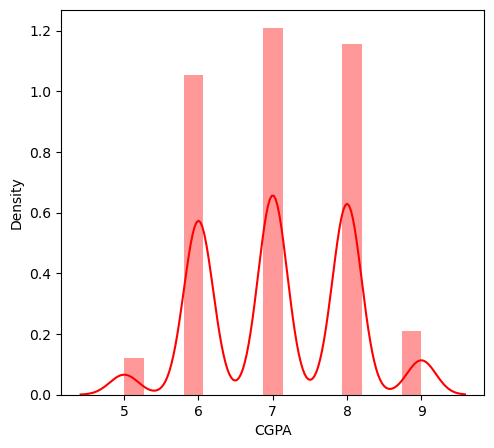

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

C:\Users\siva M\AppData\Local\Temp\ipykernel_8984\3742829894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

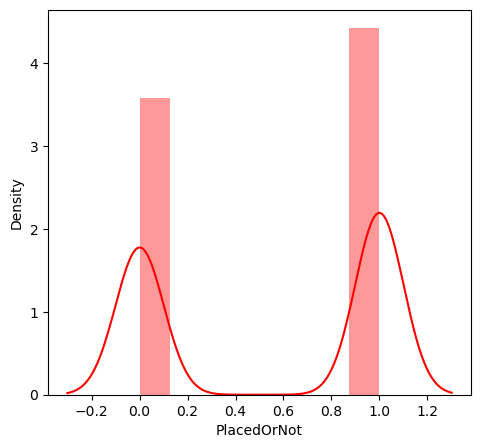

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

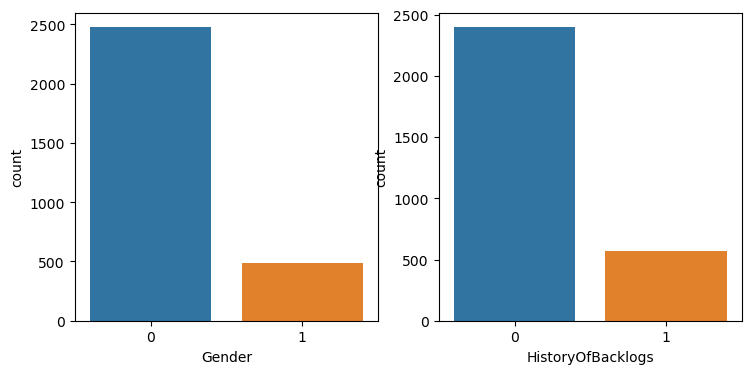

In [13]:
#plotting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x="Gender",data=df)
plt.subplot(1,4,2)
sns.countplot(x='HistoryOfBacklogs',data=df)
plt.show()

<Axes: xlabel='PlacedOrNot', ylabel='count'>

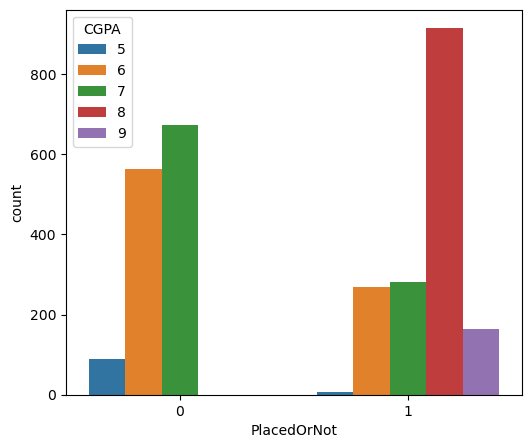

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=df['PlacedOrNot'],hue=df['CGPA'])

C:\Users\siva M\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\siva M\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

C:\Users\siva M\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\siva M\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


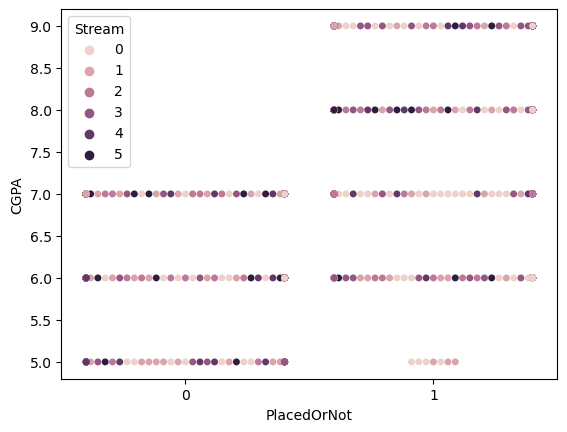

In [15]:
sns.swarmplot(x=df['PlacedOrNot'],y=df['CGPA'],hue=df['Stream'])

In [44]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,0,1,6,0,1
3,21,0,0,0,8,1,1
4,22,0,0,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,0,0,7,0,0
2962,23,0,0,1,7,0,0
2963,22,0,0,1,7,0,0
2964,22,0,0,1,7,0,0


In [16]:
# Nothing just shortening the name

mapping = {"Electronics And Communication": "ECE", "Computer Science": "CSE", "Information Technology": "IT", "Mechanical": "MECH", "Civil": "Civil", "Electrical": "EC"}

df["Stream"] = df["Stream"].map(mapping)

In [17]:
df['Stream'].value_counts()

Series([], Name: Stream, dtype: int64)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2595 non-null   int64
 1   Gender             2595 non-null   int64
 2   Stream             2595 non-null   int32
 3   Internships        2595 non-null   int64
 4   CGPA               2595 non-null   int64
 5   HistoryOfBacklogs  2595 non-null   int64
 6   PlacedOrNot        2595 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 152.1 KB


In [18]:
df.describe()

,Age,Gender,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.165543,0.703641,7.073837,0.192178,0.552596
std,1.324933,0.371732,0.740197,0.967748,0.394079,0.497310
min,19.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,21.000000,0.000000,1.000000,7.000000,0.000000,1.000000
75%,22.000000,0.000000,1.000000,8.000000,0.000000,1.000000
max,30.000000,1.000000,3.000000,9.000000,1.000000,1.000000


<Axes: xlabel='Age'>

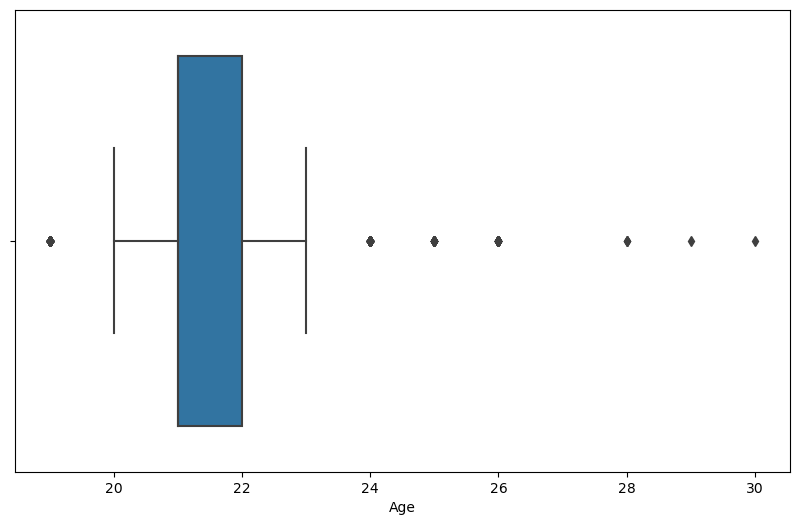

In [19]:
# I tried all the columns and find out that only age column has some outliers.

plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(x = "Age", data = df)

In [48]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [50]:
df['Stream'].unique()

array([0])

In [54]:
df['Gender'].replace({"Male":1,"Female":0})

0       0
1       1
2       1
3       0
4       0
       ..
2961    0
2962    0
2963    0
2964    0
2965    0
Name: Gender, Length: 2595, dtype: int64

In [55]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,0,1,6,0,1
3,21,0,0,0,8,1,1
4,22,0,0,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,0,0,7,0,0
2962,23,0,0,1,7,0,0
2963,22,0,0,1,7,0,0
2964,22,0,0,1,7,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2595 non-null   int64
 1   Gender             2595 non-null   int64
 2   Stream             2595 non-null   int32
 3   Internships        2595 non-null   int64
 4   CGPA               2595 non-null   int64
 5   HistoryOfBacklogs  2595 non-null   int64
 6   PlacedOrNot        2595 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 152.1 KB


In [60]:
x = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

In [58]:
x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,0,0,1,8,1
1,21,1,0,0,7,1
2,22,1,0,1,6,0
3,21,0,0,0,8,1
4,22,0,0,0,8,0
...,...,...,...,...,...,...
2961,23,0,0,0,7,0
2962,23,0,0,1,7,0
2963,22,0,0,1,7,0
2964,22,0,0,1,7,0


In [61]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2595, dtype: int64

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=15)

In [64]:
print("Shape of independent training data is {}. Shape of independent testing data is {}".format(xtrain.shape, xtest.shape))
print("Shape of dependent training data is {}. Shape of dependent testing data is {}".format(ytrain.shape, ytest.shape))

Shape of independent training data is (2076, 6). Shape of independent testing data is (519, 6)
Shape of dependent training data is (2076,). Shape of dependent testing data is (519,)


In [65]:
log_r = LogisticRegression()

In [66]:
log_r.fit(xtrain,ytrain)

LogisticRegression()

In [67]:
ypred = log_r.predict(xtest)

In [68]:
ypred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [72]:
print(ytest,ypred)

2667    1
1113    1
2862    1
2589    0
2049    1
       ..
768     1
3       1
1390    1
1177    1
817     1
Name: PlacedOrNot, Length: 519, dtype: int64 [1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1
 0 1 0 0 1 1 0 1 1 1

In [20]:
max_thresold = df['Age'].quantile(0.95)
print(max_thresold)

min_thresold = df['Age'].quantile(0.01)
print(min_thresold)

df = df[(df['Age']<max_thresold) & (df['Age']>min_thresold)]

24.0
19.0


In [22]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

#sns.countplot(x = "Stream", data = df)

<Figure size 1000x600 with 0 Axes>

In [46]:
x = df.drop('PlacedOrNot', axis=1)

In [47]:
x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,0,0,1,8,1
1,21,1,0,0,7,1
2,22,1,0,1,6,0
3,21,0,0,0,8,1
4,22,0,0,0,8,0
...,...,...,...,...,...,...
2961,23,0,0,0,7,0
2962,23,0,0,1,7,0
2963,22,0,0,1,7,0
2964,22,0,0,1,7,0


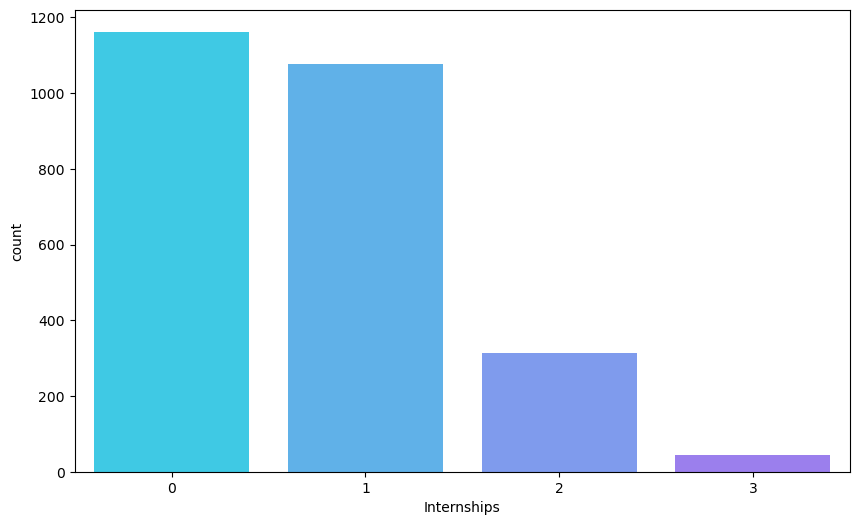

In [23]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("cool")
sns.set_palette(color_palette)

sns.countplot(x = "Internships", data = df)
plt.show()

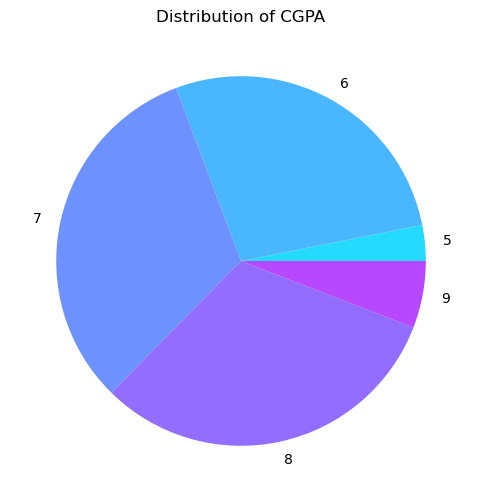

In [24]:
plt.figure(figsize = (10, 6), dpi = 100)
grp = dict(df.groupby('CGPA').groups)

m = {}

for key, val in grp.items():
    
    if key in m:
        m[key] += len(val)
        
    else:
        m[key] = len(val)

    
plt.title("Distribution of CGPA")
plt.pie(m.values(), labels = m.keys())
plt.show()

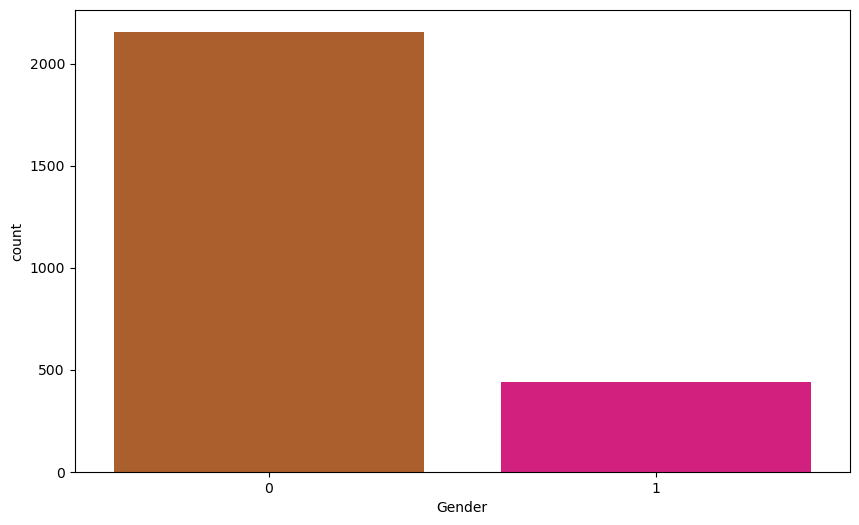

In [25]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Gender", data = df)

plt.show()

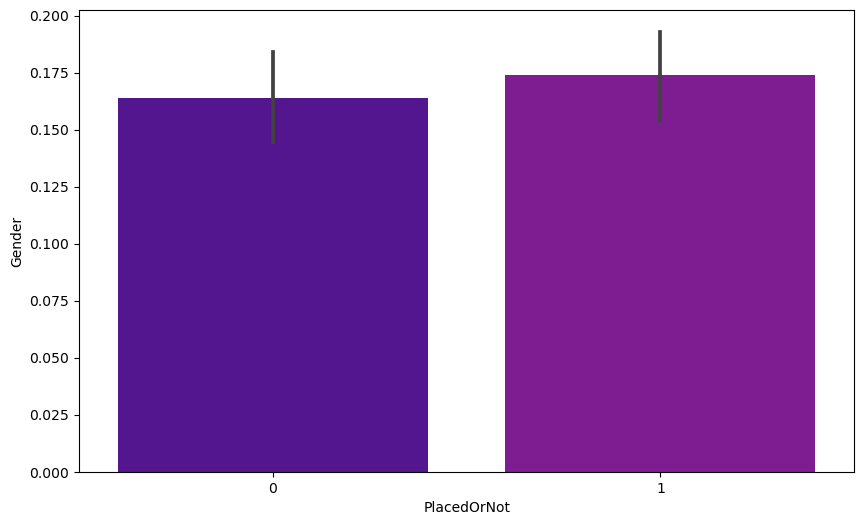

In [26]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)

sns.barplot(x = "PlacedOrNot", y = "Gender", data = df)

plt.show()


In [28]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("magma")
sns.set_palette(color_palette)

#sns.barplot(x = "Stream", y = "PlacedOrNot", data = df)

plt.show()

<Figure size 1000x600 with 0 Axes>

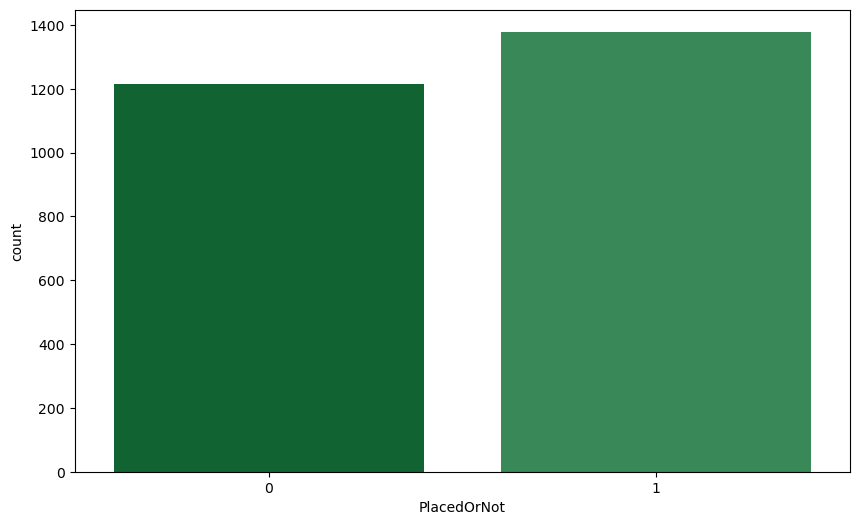

In [29]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)

sns.countplot(x = "PlacedOrNot", data = df)

plt.show()

C:\Users\siva M\AppData\Local\Temp\ipykernel_8984\2666515540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=0.9, annot=True,cmap = color)


<Axes: >

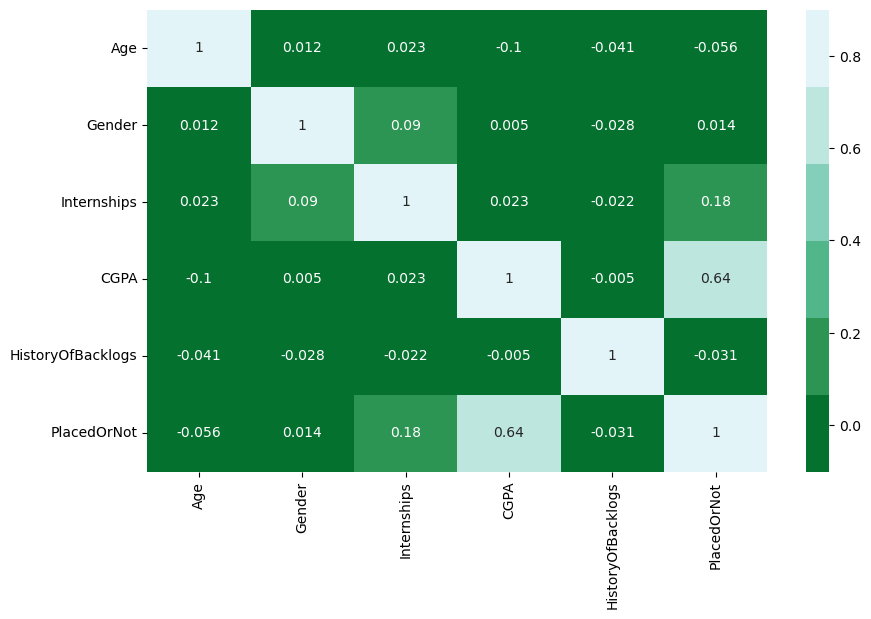

In [30]:
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("BuGn_r")
sns.heatmap(df.corr(), vmax=0.9, annot=True,cmap = color)

In [31]:
le = preprocessing.LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Stream"] = le.fit_transform(df["Stream"])

C:\Users\siva M\AppData\Local\Temp\ipykernel_8984\2976325835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = le.fit_transform(df["Gender"])
C:\Users\siva M\AppData\Local\Temp\ipykernel_8984\2976325835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Stream"] = le.fit_transform(df["Stream"])


In [74]:
(ytest,ypred)

(2667    1
 1113    1
 2862    1
 2589    0
 2049    1
        ..
 768     1
 3       1
 1390    1
 1177    1
 817     1
 Name: PlacedOrNot, Length: 519, dtype: int64,
 array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0

In [77]:
log_r.predict([[22,1,2,1,8,1]])

C:\Users\siva M\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)